In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
# Using pandas to load the data into the workspace
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv') 


In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Extracting the columns of the dataset and converting them to lower case 
col_names = df.columns.str.lower()
col_names

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [5]:
# Assign the new columns and replace   
df.columns = col_names
df.columns = df.columns.str.replace('-', '_')
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

# Exploratory Data Analysis

In [6]:
# masks for people who showed up and those that did not 
showed = df.no_show == 'No'
no_show = df.no_show == 'Yes'
showed

0         True
1         True
2         True
3         True
4         True
          ... 
110522    True
110523    True
110524    True
110525    True
110526    True
Name: no_show, Length: 110527, dtype: bool

### Does sending an SMS reminder of an appointment affect the number of no-shows?

In [7]:
#masks for those who received an sms and those who did not 
received = df.sms_received == 1
not_received = df.sms_received == 0

In [8]:
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [9]:
# For those who received the sms, how many showed and how many did not show?
received_groups = df[received].no_show.value_counts()
received_groups

No     25698
Yes     9784
Name: no_show, dtype: int64

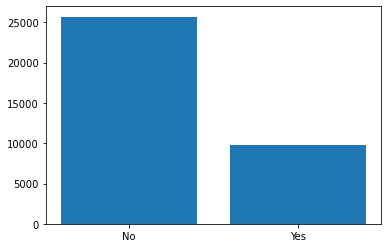

In [10]:
#Plot comparing those who showed(No) and those who did not show(Yes) after receiving the sms
plt.bar(received_groups.index, received_groups);

In [11]:
# For those who did not receive the sms, how many showed and how many did not show?
not_received_groups = df[not_received].no_show.value_counts()
not_received_groups

No     62510
Yes    12535
Name: no_show, dtype: int64

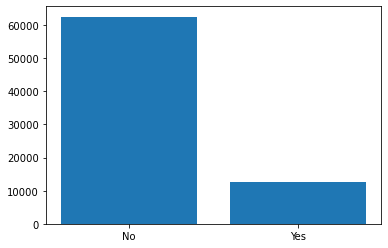

In [12]:
#Plot comparing those who showed(No) and those who did not show(Yes) although they did not receive the sms
plt.bar(not_received_groups.index, not_received_groups);

In [13]:
#Get the number of people that received the sms and showed and those who didn't received the sms but still showed 
received = df[received].no_show[showed].value_counts()
not_received = df[not_received].no_show[showed].value_counts()

# print(received)
#print(not_received)

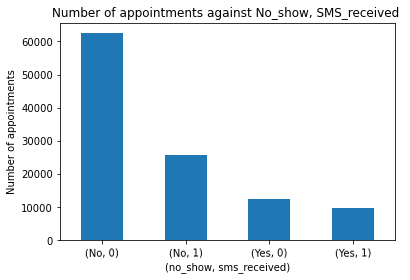

In [14]:
# Histogram based on whether or not people showed up for the appointment based on whether or not they received an sms or not
df.groupby('no_show')['sms_received'].value_counts().plot(kind = 'bar',
                                                          title = "Number of appointments against No_show, SMS_received ", 
                                                          xlabel= ('(no_show, sms_received)'),
                                                         ylabel = ('Number of appointments'),
                                                         rot = 1);

>The above plot gives a general idea of the number of who showed up or not for the appointment based on whether or not they received an sms or not. However, the contrast is quite unclear. Hence, we can compare only the people who showed or did not show up given that they received the sms. 

In [15]:

received_showed = sum(df.query('sms_received == 1')['no_show'] == 'No') #those who received the sms and showed
received_no_show = sum(df.query('sms_received == 1')['no_show'] == 'Yes')#those who received the sms but did not show

In [16]:
received_showed/received_no_show

2.62653311529027

Text(0, 0.5, 'Number of appointments')

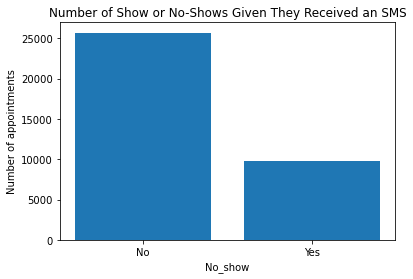

In [17]:

plt.bar(['No', 'Yes'], [received_showed, received_no_show])
plt.title('Number of Show or No-Shows Given They Received an SMS')
plt.xlabel('No_show');
plt.ylabel('Number of appointments')

### Are older people more likely to miss their appointment?

In [59]:
showed_ages = df[showed].age.value_counts()

C:\Users\LUCIND~1\AppData\Local\Temp/ipykernel_5628/1395151844.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  showed_ages = df[showed].age.value_counts()


In [60]:
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [18]:
age_below_0 = df[df['age']<=0]

In [19]:
df.drop(age_below_0.index, inplace=True, axis = 0)

In [42]:
df.shape

(106987, 14)

In [41]:
df[df['age'] == 1].

patientid         2273
appointmentid     2273
gender            2273
scheduledday      2273
appointmentday    2273
age               2273
neighbourhood     2273
scholarship       2273
hipertension      2273
diabetes          2273
alcoholism        2273
handcap           2273
sms_received      2273
no_show           2273
dtype: int64

<AxesSubplot:>

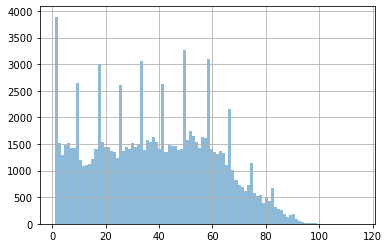

In [49]:
df.age.hist(alpha = 0.5, bins=100)

#plt.legend();

In [64]:
list(df.age).count(1)


2273

In [57]:
df[df['age'] == 1].count()

patientid         2273
appointmentid     2273
gender            2273
scheduledday      2273
appointmentday    2273
age               2273
neighbourhood     2273
scholarship       2273
hipertension      2273
diabetes          2273
alcoholism        2273
handcap           2273
sms_received      2273
no_show           2273
dtype: int64

(array([1.7497e+04, 1.4989e+04, 1.6978e+04, 1.6042e+04, 1.7215e+04,
        1.4969e+04, 6.4450e+03, 2.6960e+03, 1.5100e+02, 5.0000e+00]),
 array([  1. ,  12.4,  23.8,  35.2,  46.6,  58. ,  69.4,  80.8,  92.2,
        103.6, 115. ]),
 <BarContainer object of 10 artists>)

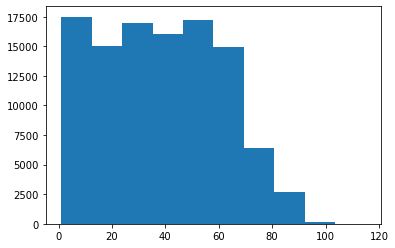

In [54]:
plt.hist(ages)

<BarContainer object of 102 artists>

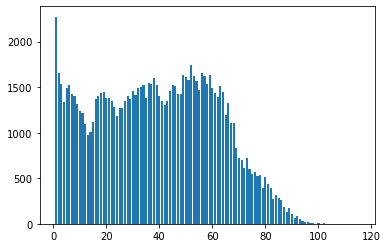

In [22]:
plt.bar(df.age[showed].value_counts().index, df.age.value_counts())


<AxesSubplot:ylabel='Frequency'>

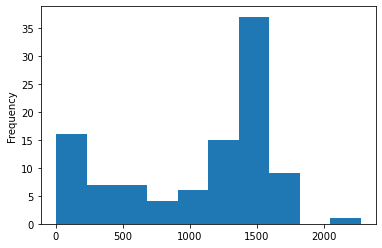

In [24]:
df.age.value_counts().plot.hist()

In [35]:
df[df['age'] > 60].no_show[showed].

0         No
2         No
5         No
24        No
32        No
          ..
110488    No
110497    No
110499    No
110503    No
110510    No
Name: no_show, Length: 16756, dtype: object

In [ ]:
df.head()

### Are females or males more likely to miss their appointment?

In [ ]:
pie_val_showed = df[showed].gender.value_counts()
pie_val_noshow = df[no_show].gender.value_counts()

In [ ]:
image, plots = plt.subplots(1, 2)

image.suptitle('Fulfilled and No=')
plots[0].pie(pie_val_showed, labels=['F','M']);
plots[0].set_title('Fulfilled Appointments')

plots[1].pie(pie_val_noshow,labels=['F','M']);
plots[1].set_title('No-show Appointments')

In [ ]:
plt.bar(['Females', 'Males'], [female_no_show, male_no_show])
plt.xlabel('Gender')
plt.ylabel('Proportion of missed appointments')
plt.title('Proportion by Gender of Missed Appointments');

# Conclusion

For people who received sms reminders of their appointments, more people showed up for their appointment than those who did not show. It can therefore be concluded that more people would show up when they are given sms reminders of their appointments. 